In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [29]:
data = "C:/Users/CLINTON/Documents/My documents/LLM/Informatics/INFX 598/Group project/clean_data.csv"
data = pd.read_csv(data)
data.head()

,energy_star_rating,january_min_temp,january_avg_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,april_min_temp,april_avg_temp,...,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,days_below_30F,days_below_20F,site_eui,State_Factor,building_class,facility_type
0,61.048605,15,38.274194,19,35.785714,60,14,38.000000,19,43.155172,...,5879,31.48,84.8,248,114,22,24.824587,State_1,Commercial,Education_Uncategorized
1,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,2842,41.12,0.0,0,15,0,37.262764,State_1,Commercial,Education_Uncategorized
2,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,2842,41.12,0.0,0,15,0,41.813722,State_1,Commercial,Education_Uncategorized
3,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,2842,41.12,0.0,0,15,0,26.233321,State_1,Commercial,Education_Uncategorized
4,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,2842,41.12,0.0,0,15,0,26.157331,State_1,Commercial,Education_Uncategorized


In [30]:
data.columns

Index(['energy_star_rating', 'january_min_temp', 'january_avg_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp',
       'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp',
       'september_avg_temp', 'november_min_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'site_eui',
       'State_Factor', 'building_class', 'facility_type'],
      dtype='object')

In [31]:
imp_feature = ['energy_star_rating', 'facility_type','building_class','january_avg_temp','precipitation_inches',
              'snowfall_inches', 'february_avg_temp','heating_degree_days','april_avg_temp','september_avg_temp','snowdepth_inches',
              'july_avg_temp','june_avg_temp','State_Factor','site_eui']

In [32]:
data = data[imp_feature]

In [33]:
#Declaring Variables
y_train = data["site_eui"]
train_data = data.drop(columns='site_eui')

In [34]:
num_pipeline = Pipeline([("scaler", LabelEncoder())])
cat_pipeline = Pipeline([("cat_encoder", LabelEncoder())])

In [35]:
numerical_features = train_data._get_numeric_data().columns 
categorical_features = train_data.columns.difference(numerical_features)

In [36]:
numerical_features

Index(['energy_star_rating', 'january_avg_temp', 'precipitation_inches',
       'snowfall_inches', 'february_avg_temp', 'heating_degree_days',
       'april_avg_temp', 'september_avg_temp', 'snowdepth_inches',
       'july_avg_temp', 'june_avg_temp'],
      dtype='object')

In [37]:
categorical_features

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [38]:
num_attribs = ['energy_star_rating', 'january_avg_temp', 'precipitation_inches',
       'snowfall_inches', 'february_avg_temp', 'heating_degree_days',
       'april_avg_temp', 'september_avg_temp', 'snowdepth_inches',
       'july_avg_temp', 'june_avg_temp']
cat_attribs = ['State_Factor', 'building_class', 'facility_type']

In [39]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [40]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])
X_train

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [27]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fitting model to training dataset
linear_model.fit(x_train, y_train)

linear_model.score(x_test, y_test)

0.34071161022527596

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(random_state=42)
rf = rf.fit(x_train, y_train)
#Checking R^2 score
rf.score(x_test, y_test)

0.36742871930543364

In [30]:
fp = rf.fit(x_train, y_train)

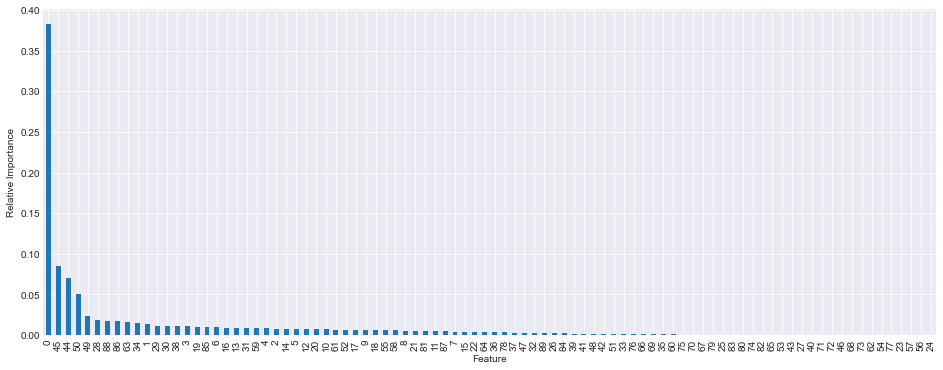

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

feature_imp = pd.Series(rf.feature_importances_, index= X_train.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [38]:
X_train = pd.DataFrame(x_train, x_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Building with just numerical variables

In [42]:
numerical_features = data._get_numeric_data().columns
numerical_features

Index(['energy_star_rating', 'january_min_temp', 'january_avg_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp',
       'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp',
       'september_avg_temp', 'november_min_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'site_eui'],
      dtype='object')

In [43]:
numerical_variables = ['energy_star_rating', 'january_min_temp', 'january_avg_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp',
       'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp',
       'september_avg_temp', 'november_min_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'site_eui']

In [44]:
numerical_data = data[numerical_variables]
numerical_data.head()

,energy_star_rating,january_min_temp,january_avg_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,april_min_temp,april_avg_temp,...,september_avg_temp,november_min_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,days_below_30F,days_below_20F,site_eui
0,61.048605,15,38.274194,19,35.785714,60,14,38.000000,19,43.155172,...,63.206897,15,225,5879,31.48,84.8,248,114,22,24.824587
1,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,64.050000,30,340,2842,41.12,0.0,0,15,0,37.262764
2,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,64.050000,30,340,2842,41.12,0.0,0,15,0,41.813722
3,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,64.050000,30,340,2842,41.12,0.0,0,15,0,26.233321
4,61.048605,21,47.693548,27,51.120690,80,31,50.758065,33,56.683333,...,64.050000,30,340,2842,41.12,0.0,0,15,0,26.157331


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns = numerical_data.columns)

In [47]:
Y = numerical_data["site_eui"]
X = numerical_data.drop(columns='site_eui')

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(random_state=42)
rf = rf.fit(x_train, y_train)
#Checking R^2 score
rf.score(x_test, y_test)

0.1807118878817915

In [50]:
fp = rf.fit(x_train, y_train)

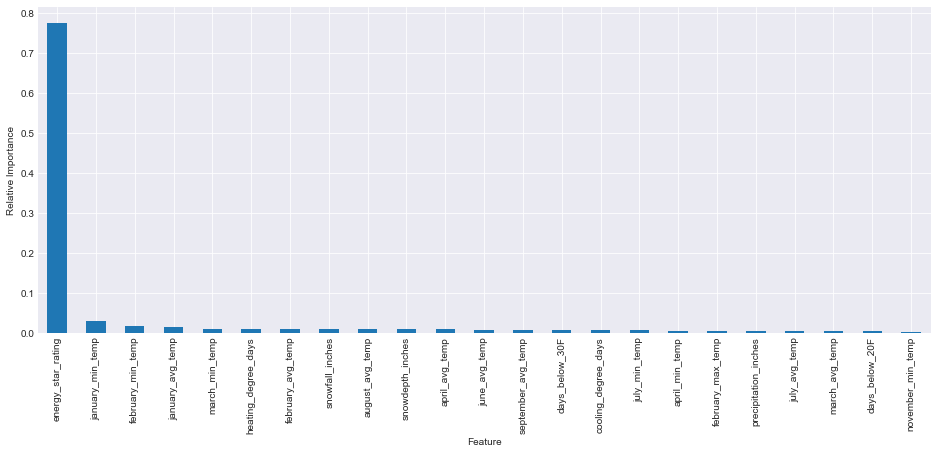

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

feature_imp = pd.Series(rf.feature_importances_, index= X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');